In [34]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
from sklearn import preprocessing

In [35]:
data = np.loadtxt("Combined-Cycle-Power-Plant-Training-Data.csv",delimiter=",")

In [36]:
data.shape

(7176, 5)

In [37]:
X = data[:,0:4]
Y = data[:,4]

In [38]:
df = pd.DataFrame(X)
df.describe()

,0,1,2,3
count,7176.000000,7176.000000,7176.000000,7176.000000
mean,19.629712,54.288154,1013.263032,73.275818
std,7.475256,12.751468,5.964863,14.625093
min,1.810000,25.360000,992.890000,25.560000
25%,13.470000,41.740000,1009.010000,63.202500
50%,20.315000,52.050000,1012.910000,74.895000
75%,25.720000,66.540000,1017.302500,84.925000
max,35.770000,81.560000,1033.300000,100.160000


In [39]:
features = df.columns

for feature1 in features:
    for feature2 in features:
        comp_feature = str(feature1) + "_" + str(feature2)
        df[comp_feature] = df[feature1]*df[feature2]
df.describe()

,0,1,2,3,0_0,0_1,0_2,0_3,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,3_0,3_1,3_2,3_3
count,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7.176000e+03,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000
mean,19.629712,54.288154,1013.263032,73.275818,441.197241,1146.231808,19867.363330,1378.774523,1146.231808,3109.780886,54976.439908,3919.161261,19867.363330,54976.439908,1.026738e+06,74256.519210,1378.774523,3919.161261,74256.519210,5583.209039
std,7.475256,12.751468,5.964863,14.625093,291.386373,636.684493,7517.119525,473.236585,636.684493,1422.362595,12779.352400,1046.138478,7517.119525,12779.352400,1.209811e+04,14859.343071,473.236585,1046.138478,14859.343071,2069.245715
min,1.810000,25.360000,992.890000,25.560000,3.276100,71.350200,1858.725200,139.315700,71.350200,643.129600,25569.727200,1288.095100,1858.725200,25569.727200,9.858306e+05,25975.094400,139.315700,1288.095100,25975.094400,653.313600
25%,13.470000,41.740000,1009.010000,63.202500,181.440900,560.804700,13693.439600,1013.035325,560.804700,1742.227600,42336.385100,3185.409600,13693.439600,42336.385100,1.018101e+06,64009.632900,1013.035325,3185.409600,64009.632900,3994.556175
50%,20.315000,52.050000,1012.910000,74.895000,412.699250,1109.562200,20594.238400,1397.303800,1109.562200,2709.202500,52623.837200,3744.296400,20594.238400,52623.837200,1.025987e+06,75987.455850,1397.303800,3744.296400,75987.455850,5609.261050
75%,25.720000,66.540000,1017.302500,84.925000,661.518400,1680.519250,26007.215325,1748.473500,1680.519250,4427.571600,67323.618375,4551.250050,26007.215325,67323.618375,1.034904e+06,86194.654150,1748.473500,4551.250050,86194.654150,7212.255700
max,35.770000,81.560000,1033.300000,100.160000,1279.492900,2722.111000,35997.497200,2647.989600,2722.111000,6652.033600,82095.849200,7593.682400,35997.497200,82095.849200,1.067709e+06,102298.000000,2647.989600,7593.682400,102298.000000,10032.025600


In [40]:
X = df.values

In [41]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
X_scaled = scaler.transform(X)

In [43]:
X_ = np.append(X_scaled,np.ones(X_scaled.shape[0]).reshape(-1,1),axis=1)

In [44]:
X_.shape

(7176, 21)

In [45]:
def cost(X_train,m,Y_train):
    cost_ = 0
    N = X_train.shape[0]
    for i in range(N):
        cost_ += (1/N)*((Y_train[i]-((X_train[i]*m).sum()))**2)
    return cost_

In [46]:
def step_gradient(X_train,Y_train,m,lr):
    
    slope_m = np.zeros(X_train.shape[1])
    N = X_train.shape[0]
    
    for i in range(N):
        slope_m += (2/N)*(Y_train[i]-(m*X_train[i]).sum())*(-X_train[i])
        
    m = m - (lr * slope_m)
    
    return m

In [93]:
def fit(X_train,Y_train,lr=0.001,epochs=100,verbose=False):
    m = np.zeros(X_train.shape[1])
    last_m = m
    least_m = m
    least_cost = 2147483648
    cost_array = []
    unit = epochs//100
    for i in range(epochs+1):
        last_m = m
        m = step_gradient(X_train,Y_train,m,lr)
        cost_ = cost(X_train,m,Y_train)
        #verbose is used to only show the learning process if required, else it is False by default
        if i>0:
            if cost_<least_cost:
                least_cost = cost_
                least_m = m
            if cost_>cost_array[-1]:
                m = least_m
                lr/=10
        if verbose and i%unit==0:
            print("epoch:",i,"cost:",cost_)
            cost_array.append(cost_)
    
    #To continue the learning loop incase the current epoch and learning parameters doesn't lead to saturation
    cont = input("Do you want to continue?:")
        
    while cont=="y":
        clear_output(wait=True)
        epochs = int(input("Please enter the number of epochs to continue for:"))
        unit = int(input("Please enter the unit point for epochs:"))
        lr_factor = float(input("Please enter the decay factor for the learning rate:"))
        lr*=lr_factor
        for i in range(epochs+1):
            last_m = m
            m = step_gradient(X_train,Y_train,m,lr)
            cost_ = cost(X_train,m,Y_train)
            if cost_<least_cost:
                least_cost = cost_
                least_m = m
            if i>0:
                if cost_>cost_array[-1]:
                    m = least_m
                    lr/=10
            if verbose and i%unit==0:
                print("epoch:",i,"cost:",cost_)
                cost_array.append(cost_)
        cont = input("Do you want to continue?:")
        
    return least_m,cost_array

In [82]:
def predict(X_test,m):
    y_pred = []
    for i in range(X_test.shape[0]):
        y_pred.append((X_test[i]*m).sum())
    return np.array(y_pred)

In [83]:
def score(Y_true,Y_pred):
    u = ((Y_true-Y_pred)**2).sum()
    v = ((Y_true-(Y_true.mean()))**2).sum()
    return 1-(u/v)

In [94]:
m, cost_array = fit(X_,Y,epochs=10000,lr=0.07,verbose=True)
print(m)

epoch: 0 cost: 152913.13342321428
epoch: 100 cost: 19.959037538592327
epoch: 200 cost: 19.510374026363312
epoch: 300 cost: 19.239230956938446
epoch: 400 cost: 19.07123256290399
epoch: 500 cost: 18.966636855850577
epoch: 600 cost: 18.901140100520575
epoch: 700 cost: 18.859775580205845
epoch: 800 cost: 18.833322430840685
epoch: 900 cost: 18.8160986959899
epoch: 1000 cost: 18.804602206281746
epoch: 1100 cost: 18.796673492347573
epoch: 1200 cost: 18.79098021235132
epoch: 1300 cost: 18.786699599818416
epoch: 1400 cost: 18.78332287248689
epoch: 1500 cost: 18.780534757621222
epoch: 1600 cost: 18.778139282354235
epoch: 1700 cost: 18.77601405947352
epoch: 1800 cost: 18.774082124321378
epoch: 1900 cost: 18.772294582130268
epoch: 2000 cost: 18.770619914135626
epoch: 2100 cost: 18.7690373853883
epoch: 2200 cost: 18.76753297930058
epoch: 2300 cost: 18.766096888842398
epoch: 2400 cost: 18.76472196686803
epoch: 2500 cost: 18.763402767514194
epoch: 2600 cost: 18.76213495194973
epoch: 2700 cost: 18.760

KeyboardInterrupt: 

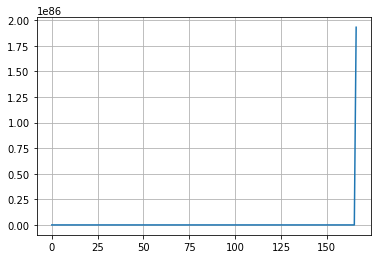

In [70]:
plt.plot(cost_array)
plt.grid()
plt.show()

In [71]:
y_pred = predict(X_,m)
y_pred.shape

(7176,)

In [72]:
score(Y,y_pred)

0.9362842882453314

In [73]:
X_test = np.loadtxt("Combined-Cycle-Power-Plant-Testing-Data.csv",delimiter=",")

In [74]:
df_test = pd.DataFrame(X_test)

In [75]:
features = df_test.columns

for feature1 in features:
    for feature2 in features:
        comp_feature = str(feature1) + "_" + str(feature2)
        df_test[comp_feature] = df_test[feature1]*df_test[feature2]
df_test.describe()

,0,1,2,3,0_0,0_1,0_2,0_3,1_0,1_1,1_2,1_3,2_0,2_1,2_2,2_3,3_0,3_1,3_2,3_3
count,2392.00000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2.392000e+03,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,19.71579,54.358754,1013.247216,73.408457,443.226037,1149.740066,19955.219246,1390.019112,1149.740066,3113.033278,55049.260708,3935.261049,19955.219246,55049.260708,1.026704e+06,74388.923498,1390.019112,3935.261049,74388.923498,5599.780087
std,7.38488,12.578763,5.861068,14.528135,287.407312,627.053285,7427.435464,475.576336,627.053285,1401.229497,12611.977373,1045.122582,7427.435464,12611.977373,1.188478e+04,14757.433654,475.576336,1045.122582,14757.433654,2047.547505
min,3.38000,25.360000,993.740000,26.670000,11.424400,126.684000,3417.180000,274.523600,126.684000,643.129600,25579.364000,1563.855000,3417.180000,25579.364000,9.875192e+05,27097.520100,274.523600,1563.855000,27097.520100,711.288900
25%,13.66000,41.730000,1009.300000,63.615000,186.595600,573.796800,13889.630825,1028.663175,573.796800,1741.393200,42374.434750,3202.516800,13889.630825,42374.434750,1.018686e+06,64537.750975,1028.663175,3202.516800,64537.750975,4046.868300
50%,20.45000,52.750000,1013.025000,75.090000,418.202500,1129.940200,20679.438950,1399.728850,1129.940200,2782.562500,53174.213000,3763.532000,20679.438950,53174.213000,1.026220e+06,76065.352700,1399.728850,3763.532000,76065.352700,5638.508100
75%,25.67250,66.490000,1017.172500,84.497500,659.077275,1674.667525,25990.088275,1759.159200,1674.667525,4420.920100,67057.702400,4619.263725,25990.088275,67057.702400,1.034640e+06,85669.176775,1759.159200,4619.263725,85669.176775,7139.827675
max,37.11000,80.250000,1033.290000,100.130000,1377.152100,2699.660600,37341.195300,2563.845000,2699.660600,6440.062500,81090.844800,7158.044000,37341.195300,81090.844800,1.067688e+06,101540.702800,2563.845000,7158.044000,101540.702800,10026.016900


In [76]:
X_test = df_test.values

In [77]:
X_test_scaled = scaler.transform(X_test)

In [78]:
X_test_scaled_ = np.append(X_test_scaled,np.ones(X_test_scaled.shape[0]).reshape(-1,1),axis=1)

In [79]:
y_pred_test = predict(X_test_scaled_,m)

In [80]:
np.savetxt('pred_dummy_features_feature_scaling_hetero.csv',y_pred_test)